# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.73'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())

## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Spec'],
 sort=True)
diad_meta[0]

'01 K23_mountmap.txt'

## Now get all the important information out of the metadata files

In [5]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=prefix_str,
trupower=TruPower)
meta.head()

100%|██████████| 24/24 [00:00<00:00, 668.91it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,KS23_314_FIA_50X_rep1.txt,"September 22, 2023\n",September,22.0,11.996,60.0,4.0,50.0,"['0h', '4m', '2s']",11:01:58 AM\n,39718.0,1325.004
1,KS23_314_FIA_50X_rep2.txt,"September 22, 2023\n",September,22.0,19.859,60.0,4.0,50.0,"['0h', '4m', '1s']",11:06:07 AM\n,39967.0,1325.004
2,KS23_314_FIB_50X_nodiad.txt,"September 22, 2023\n",September,22.0,20.093,60.0,4.0,50.0,"['0h', '4m', '2s']",11:19:03 AM\n,40743.0,1325.004
3,KS23_316_FIA_50X_rep1.txt,"September 22, 2023\n",September,22.0,20.030,60.0,4.0,50.0,"['0h', '4m', '1s']",11:41:25 AM\n,42085.0,1325.004
4,KS23_316_FIC_50X.txt,"September 22, 2023\n",September,22.0,12.037,60.0,4.0,100.0,"['0h', '4m', '1s']",11:47:23 AM\n,42443.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'KS23_314_FIA_50X_rep1'

## Now get filename from spectra into same form as metadata

In [7]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
KS23_314_FIA_50X_rep1


In [8]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,KS23_314_FIA_50X_rep1,103.228535,0.015685,1285.769628,0.014244,108.870393,1285.769628,138.044002,0.545301,2.043808,...,September,22.0,11.996,60.0,4.0,50.0,"['0h', '4m', '2s']",11:01:58 AM\n,39718.0,1325.004
1,KS23_314_FIA_50X_rep2,103.198886,0.011066,1285.800858,0.009838,181.066258,1285.800858,217.898363,0.554160,2.877828,...,September,22.0,19.859,60.0,4.0,50.0,"['0h', '4m', '1s']",11:06:07 AM\n,39967.0,1325.004
2,KS23_316_FIA_50X_rep1,103.224765,0.006867,1285.733710,0.006184,263.100113,1285.733710,366.952283,0.551722,2.112362,...,September,22.0,20.030,60.0,4.0,50.0,"['0h', '4m', '1s']",11:41:25 AM\n,42085.0,1325.004
3,KS23_316_FIC_50X,103.280611,0.014488,1285.599755,0.013500,108.860424,1285.599755,158.292088,0.558273,1.549635,...,September,22.0,12.037,60.0,4.0,100.0,"['0h', '4m', '1s']",11:47:23 AM\n,42443.0,1325.004
4,KS23_316_FIB_50X,103.278154,0.013608,1285.643578,0.012637,117.335872,1285.643578,167.340198,0.557293,1.719460,...,September,22.0,12.028,60.0,4.0,100.0,"['0h', '4m', '1s']",11:53:36 AM\n,42816.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [9]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [10]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,KS23_314_FIA_50X_rep1,0.093341,0.007282,0.006211,0.003802,102.985822,0.015675,0.000911,0.015685,11.996,...,39718.0,NaN,NaN,NaN,NaN,NaN,39718.0,0.997649,0.997640,0.997658
1,KS23_314_FIA_50X_rep2,0.081487,0.005807,0.004389,0.003802,102.955905,0.011077,0.000903,0.011066,19.859,...,39967.0,NaN,NaN,NaN,NaN,NaN,39967.0,0.997646,0.997637,0.997654
2,KS23_316_FIA_50X_rep1,0.090661,0.004683,0.002736,0.003801,102.979059,0.006904,0.000858,0.006867,20.030,...,42085.0,NaN,NaN,NaN,NaN,NaN,42085.0,0.997620,0.997611,0.997628
3,KS23_316_FIC_50X,0.112573,0.006891,0.005737,0.003817,103.034359,0.014479,0.000853,0.014488,12.037,...,42443.0,NaN,NaN,NaN,NaN,NaN,42443.0,0.997616,0.997607,0.997624
4,KS23_316_FIB_50X,0.111436,0.006603,0.005390,0.003816,103.031490,0.013602,0.000849,0.013608,12.028,...,42816.0,NaN,NaN,NaN,NaN,NaN,42816.0,0.997612,0.997603,0.997620


In [11]:
# This cell saves the merged together dataframe with the folder name and the date you fitted it
from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_September 22, 2023_fitted_2023-09-22.xlsx


## This helps visualize the errors on each spectra 

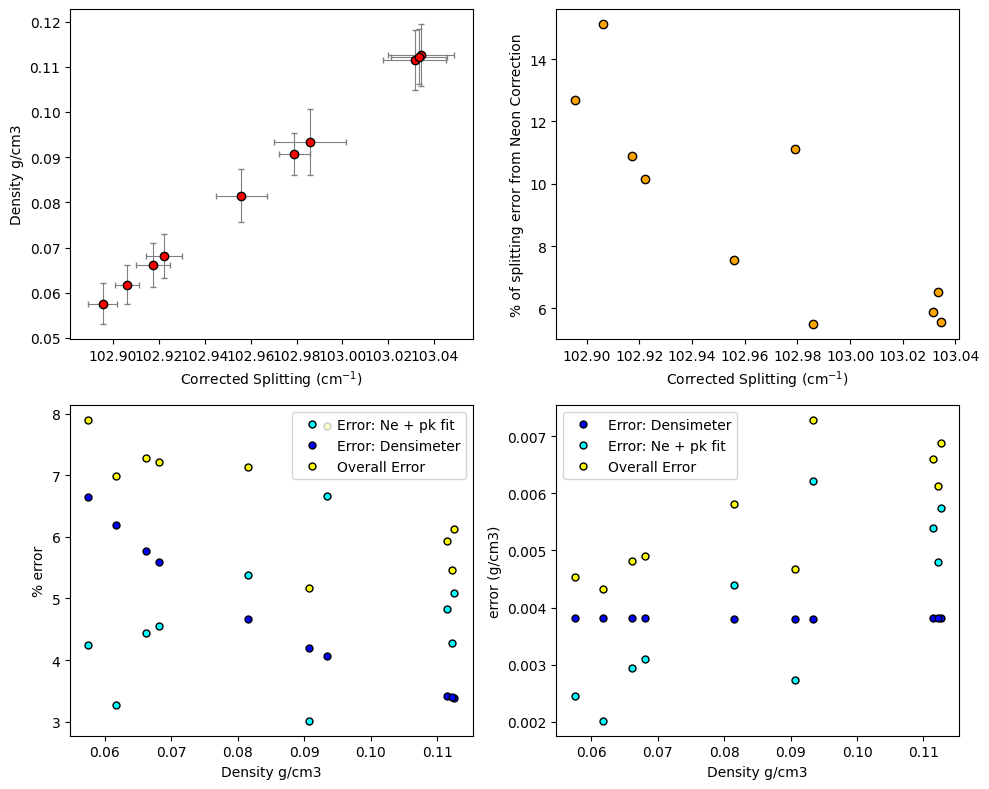

In [12]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## IF FIs
- This calculates an estimated pressure of entrapment based on a temperature you have estimated

Text(0, 0.5, '# of FI')

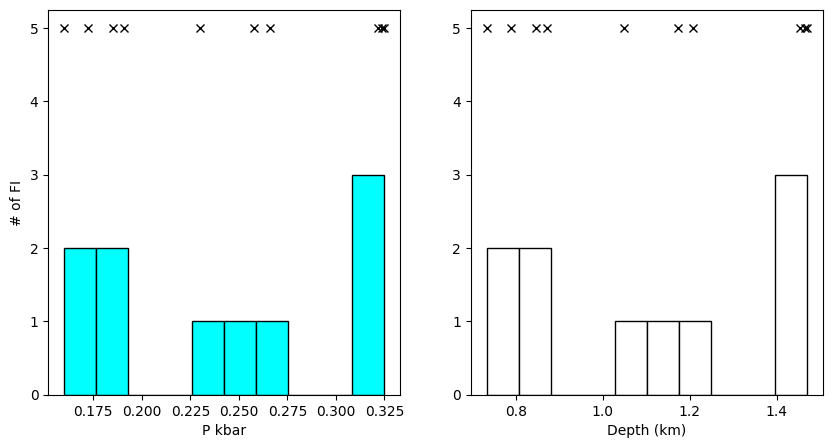

In [13]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SP94')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                model='ryan_lerner')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [14]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,KS23_314_FIA_50X_rep1,0.093341,0.007282,0.006211,0.003802,102.985822,0.015675,0.000911,0.015685,11.996,...,39718.0,NaN,NaN,NaN,NaN,NaN,39718.0,0.997649,0.997640,0.997658
1,KS23_314_FIA_50X_rep2,0.081487,0.005807,0.004389,0.003802,102.955905,0.011077,0.000903,0.011066,19.859,...,39967.0,NaN,NaN,NaN,NaN,NaN,39967.0,0.997646,0.997637,0.997654
2,KS23_316_FIA_50X_rep1,0.090661,0.004683,0.002736,0.003801,102.979059,0.006904,0.000858,0.006867,20.030,...,42085.0,NaN,NaN,NaN,NaN,NaN,42085.0,0.997620,0.997611,0.997628
3,KS23_316_FIC_50X,0.112573,0.006891,0.005737,0.003817,103.034359,0.014479,0.000853,0.014488,12.037,...,42443.0,NaN,NaN,NaN,NaN,NaN,42443.0,0.997616,0.997607,0.997624
4,KS23_316_FIB_50X,0.111436,0.006603,0.005390,0.003816,103.031490,0.013602,0.000849,0.013608,12.028,...,42816.0,NaN,NaN,NaN,NaN,NaN,42816.0,0.997612,0.997603,0.997620
5,KS23_316_FIA_50X_rep2,0.112237,0.006130,0.004797,0.003817,103.033510,0.012106,0.000846,0.012106,12.022,...,43116.0,NaN,NaN,NaN,NaN,NaN,43116.0,0.997608,0.997600,0.997617
6,KS23_315_FIA_50X,0.068102,0.004911,0.003098,0.003811,102.922127,0.007818,0.000880,0.007787,12.006,...,47895.0,1151.271035,57.676002,52.088541,Spline,0.051201,47895.0,0.997568,0.997559,0.997577
7,KS23_315_FIB_50X,0.057519,0.004538,0.002443,0.003824,102.895417,0.006165,0.000888,0.006116,12.010,...,48235.0,1151.595505,25.842336,26.319118,Spline,0.020594,48235.0,0.997566,0.997557,0.997574
8,KS23_315_FIC_50X,0.061735,0.004318,0.002016,0.003818,102.906058,0.005088,0.000895,0.005021,12.013,...,48501.0,1151.330029,58.334724,49.635630,Spline,0.034759,48501.0,0.997564,0.997556,0.997573
9,KS23_315_FID_50X,0.066167,0.004815,0.002940,0.003813,102.917243,0.007420,0.000904,0.007383,12.001,...,48827.0,1151.241537,265.127682,172.452336,Spline,0.221221,48827.0,0.997562,0.997554,0.997571


Text(0, 0.5, 'SO2/Diadratio')

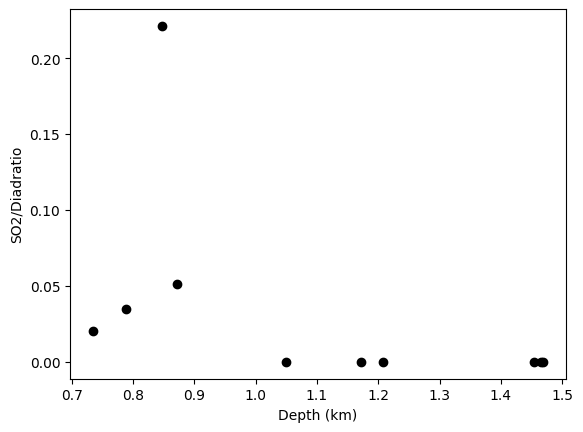

In [15]:
plt.plot(Depth, df['SO2_Diad_Ratio'].fillna(0), 'ok')
plt.xlabel('Depth (km)')
plt.ylabel('SO2/Diadratio')

In [16]:
df.columns

Index(['filename', 'Density g/cm3', 'σ Density g/cm3',
       'σ Density g/cm3 (from Ne+peakfit)',
       'σ Density g/cm3 (from densimeter)', 'Corrected_Splitting',
       'Corrected_Splitting_σ', 'Corrected_Splitting_σ_Ne',
       'Corrected_Splitting_σ_peak_fit', 'power (mW)', 'Spectral Center',
       'Preferred D_σ_Ne', 'Preferred D_σ_pkfit', 'in range', 'Notes',
       'LowD_RT', 'HighD_RT', 'LowD_SC', 'LowD_SC_σ', 'MedD_SC', 'MedD_SC_σ',
       'HighD_SC', 'HighD_SC_σ', 'Temperature', 'Splitting', 'Split_σ',
       'Diad1_Combofit_Cent', 'Diad1_cent_err', 'Diad1_Combofit_Height',
       'Diad1_Voigt_Cent', 'Diad1_Voigt_Area', 'Diad1_Voigt_Sigma',
       'Diad1_Residual', 'Diad1_Prop_Lor', 'Diad1_fwhm', 'Diad1_refit',
       'Diad2_Combofit_Cent', 'Diad2_cent_err', 'Diad2_Combofit_Height',
       'Diad2_Voigt_Cent', 'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma',
       'Diad2_Voigt_Gamma', 'Diad2_Residual', 'Diad2_Prop_Lor', 'Diad2_fwhm',
       'Diad2_refit', 'HB1_Cent', 'HB1_Area', '